# Demand Prediction

__Changing terminologies:__

Now we will substitute $f_{\vec{w}, b}(\vec{x})$ with $a$, which stands for "activation" of a neuron, from neuroscience.

A Neural Network with multiple hidden layers is also known as a multi layer perceptron.

One way of thinking about a neural network is that the last hidden layer is essentially doing a logistic regression and finding the output layer, but with a better sort of features as compared to the initial features that we used as inputs

Logistic regression that learns it's own features

## Neural Network Architecture
- How many hidden layers?
- How many neurons per hidden layer?

# Neural network Layers

## Notation

We, will be denoting the nuber of layer by [i], that is <br>
the parameters for the $i^{th}$ neuron of the $j^{th}$ layer will be written as $\vec{w}_i^{[j]} \text{ and } b_i^{[j]}$<br>
__For Example:__
$$a_1^{[2]} = g(\vec{w_1} \cdot \vec{a}^{[1]} + b_1)$$

## More Complex Neural Network

Example of a neural network with four layers:
$$\vec{x} \longrightarrow \begin{bmatrix}
                \vec{w}_1^{[1]}, b_1^{[1]} \\
                \vec{w}_2^{[1]}, b_2^{[1]} \\
                \vec{w}_3^{[1]}, b_3^{[1]} \\
                \vec{w}_4^{[1]}, b_4^{[1]} \\
            \end{bmatrix} \underrightarrow{\vec{a}^{[1]}}
            \begin{bmatrix}
                \vec{w}_1^{[2]}, b_1^{[2]} \\
                \vec{w}_2^{[2]}, b_2^{[2]} \\
                \vec{w}_3^{[2]}, b_3^{[2]} \\
                \vec{w}_4^{[2]}, b_4^{[2]} \\
                \vec{w}_5^{[2]}, b_5^{[2]} \\
            \end{bmatrix} \underrightarrow{\vec{a}^{[2]}}
            \begin{bmatrix}
                \vec{w}_1^{[3]}, b_1^{[3]} \\
                \vec{w}_2^{[3]}, b_2^{[3]} \\
                \vec{w}_3^{[3]}, b_3^{[3]} \\
            \end{bmatrix} \underrightarrow{\vec{a}^{[3]}}
            \begin{bmatrix}
                \vec{w}_1^{[4]}, b_1^{[4]} \\
            \end{bmatrix} \underrightarrow{\vec{a}^{[4]}}$$
__Here for example:__
$$\vec{a}^{[3]} = \begin{bmatrix}
                      g(\vec{w}_1^{[3]} \cdot \vec{a}^{[2]} + b_1^{[3]}) \\
                      g(\vec{w}_2^{[3]} \cdot \vec{a}^{[2]} + b_2^{[3]}) \\
                      g(\vec{w}_3^{[3]} \cdot \vec{a}^{[2]} + b_3^{[3]}) \\
                  \end{bmatrix}$$
g here is the activation function, which maybe sigmoid function of any other function that we will see later, and:

$$\vec{x} = \vec{a}^{[0]}$$

## Forward Propagation

#### Tensorflow and Keras

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

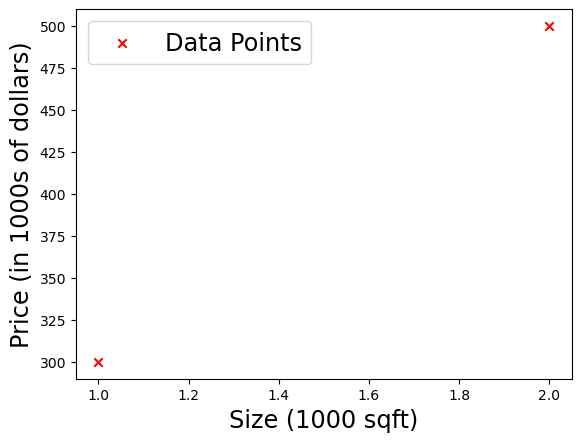

In [7]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [9]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

In [10]:
linear_layer.get_weights()

[]

In [14]:
a1 = linear_layer(X_train[0].reshape(1,1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.0993451]], dtype=float32)>

In [15]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[1.0993451]], b=[0.]


In [16]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [17]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [18]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

In [19]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [20]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

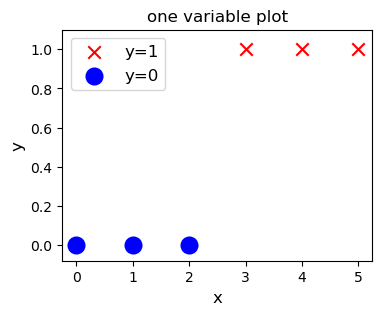

In [23]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              c="b",lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [24]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[1.4832665]] [0.]
(1, 1) (1,)


In [27]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]
